In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
 

In [2]:
def text_preprocessing(text):

        #Remove html tags
        pattern = re.compile('<.*?>')
        text =  pattern.sub(r'', text)
    
        #Remove urls
        #text = re.sub(r'https?://\S+|www\.\S+', '', text)
        temp = re.compile(r'https?://\S+|www\.\S+')
        text =  temp.sub('', text)

        #Lowering the text
        text = text.lower()

        #Removing punctions
        '''
        exclude = string.punctuation
        text =  text.translate(str.maketrans('','',exclude))
        '''
        text =  text.translate(str.maketrans('','',string.punctuation))

        #Tokanizing text
        text = word_tokenize(text)

        #Removinng stopwords
        stopwords_to_remove = stopwords.words('english')
        text = [word for word in text if word not in stopwords_to_remove]
        '''
        for w in text.split():
            if w in stopwords_to_remove:
                text = ''.join(text.replace(w, ''))
        '''

        #Lemmatization
        lemmatizer = WordNetLemmatizer()
        text = ' '.join([lemmatizer.lemmatize(word) for word in text])

        return text

In [3]:

dataset = pd.read_csv("C:\\Users\\Aditya\\Downloads\\archive (2)\\Dataset-SA.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [5]:
dataset = dataset.drop(columns=['Review','product_name','product_price','Rate'],axis=1)

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.isnull().value_counts()

Summary  Sentiment
False    False        205041
Name: count, dtype: int64

In [8]:
sample = dataset.sample(frac=0.5)

In [9]:
sample.describe()

,Summary,Sentiment
count,102520,102520
unique,50185,3
top,good,positive
freq,8656,83358


In [10]:
sample['Sentiment'].value_counts()

Sentiment
positive    83358
negative    14006
neutral      5156
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
X = sample['Summary'].apply(text_preprocessing)
y = sample['Sentiment']

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
print(y)

[2 2 2 ... 2 2 2]


In [14]:
print(X.shape)
print(y.shape)
print(X.dtype)
print(y.dtype)


(102520,)
(102520,)
object
int32


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [17]:
print("X_train_tfidf shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test_tfidf shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)



X_train_tfidf shape :  (82016,)
y_train shape :  (82016,)
X_test_tfidf shape :  (20504,)
y_test shape :  (20504,)


In [23]:
import matplotlib.pyplot as plt

In [41]:

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def SupportVectorMachinemodel(X_train, y_train, X_test, y_test):
        svm_model = SVC(kernel='linear')
        svm_model.fit(X_train, y_train)
        prediction = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test,prediction)
        plt.figure(figsize=(12, 6))

    # Histogram for y_test and prediction distributions
        plt.hist(y_test, bins=10, alpha=0.5, label="True Values (y_test)", color='blue', edgecolor='black')
        plt.hist(prediction, bins=10, alpha=0.5, label="Predicted Values", color='orange', edgecolor='black')

    # Plot settings
        plt.title("Distribution of True and Predicted Values", fontsize=16)
        plt.xlabel("Class/Value", fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True)
        print("Support Vector Machine accuracy : ", accuracy*100)

def DecisionTreemodel(X_train, y_train, X_test, y_test):
        tree_model = DecisionTreeClassifier()
        tree_model.fit(X_train, y_train)
        prediction = tree_model.predict(X_test)
        accuracy = accuracy_score(y_test,prediction)
        plt.figure(figsize=(12, 6))

    # Histogram for y_test and prediction distributions
        plt.hist(y_test, bins=10, alpha=0.5, label="True Values (y_test)", color='blue', edgecolor='black')
        plt.hist(prediction, bins=10, alpha=0.5, label="Predicted Values", color='orange', edgecolor='black')

    # Plot settings
        plt.title("Distribution of True and Predicted Values", fontsize=16)
        plt.xlabel("Class/Value", fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True)
        print("DecisionTree accuracy : ", accuracy*100)


def RandomForestmodel(X_train, y_train, X_test, y_test):
    # Initialize and train the RandomForest model
    rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
    rf_model.fit(X_train, y_train)
    prediction = rf_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, prediction)
    print("Random Forest accuracy: {:.2f}%".format(accuracy * 100))

    # Create histograms
    plt.figure(figsize=(12, 6))

    # Histogram for y_test and prediction distributions
    plt.hist(y_test, bins=10, alpha=0.5, label="True Values (y_test)", color='blue', edgecolor='black')
    plt.hist(prediction, bins=10, alpha=0.5, label="Predicted Values", color='orange', edgecolor='black')

    # Plot settings
    plt.title("Distribution of True and Predicted Values", fontsize=16)
    plt.xlabel("Class/Value", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

DecisionTree accuracy :  89.75321888412017


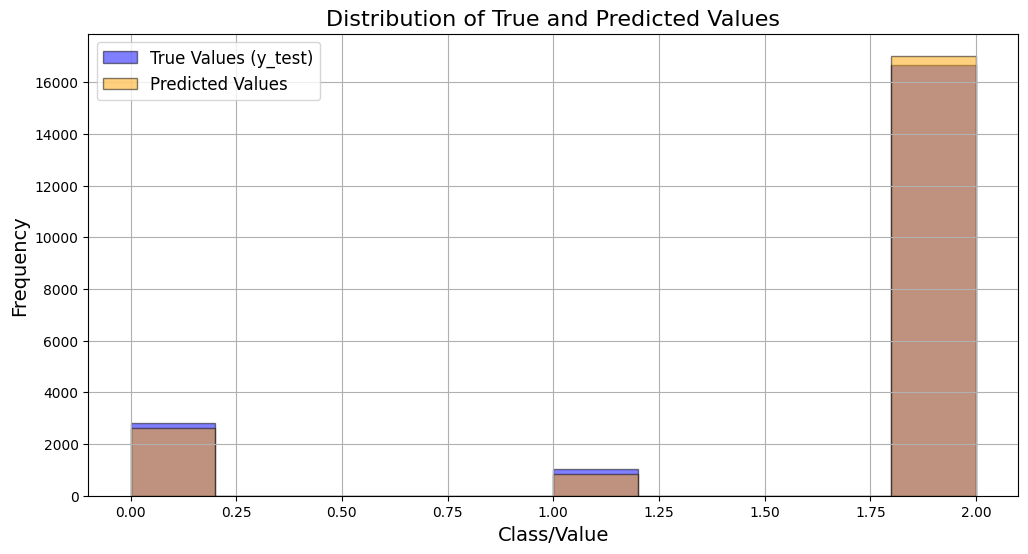

In [42]:
DecisionTreemodel(X_train_tfidf, y_train, X_test_tfidf, y_test)

Random Forest accuracy: 91.15%


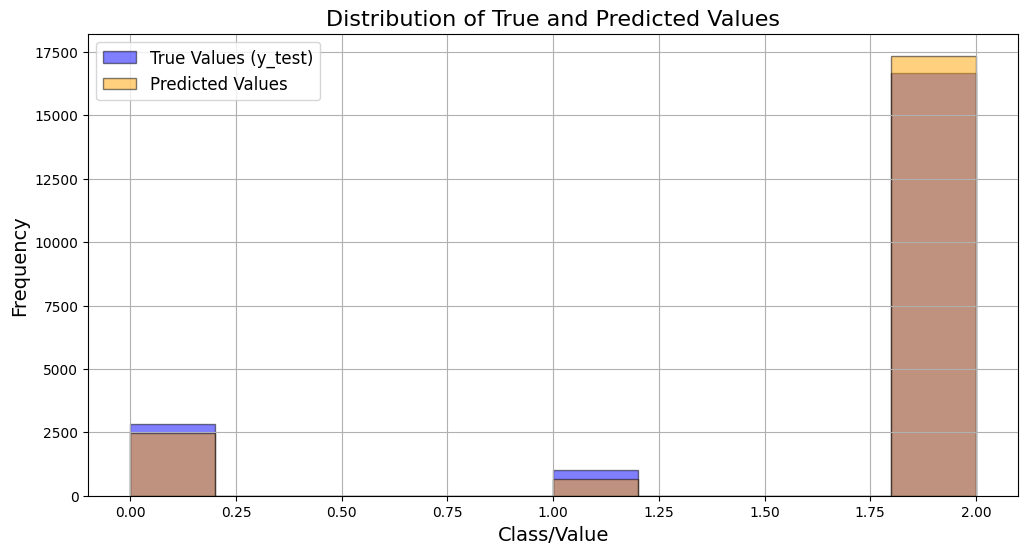

In [43]:
RandomForestmodel(X_train_tfidf, y_train, X_test_tfidf, y_test)

Support Vector Machine accuracy :  90.76765509168942


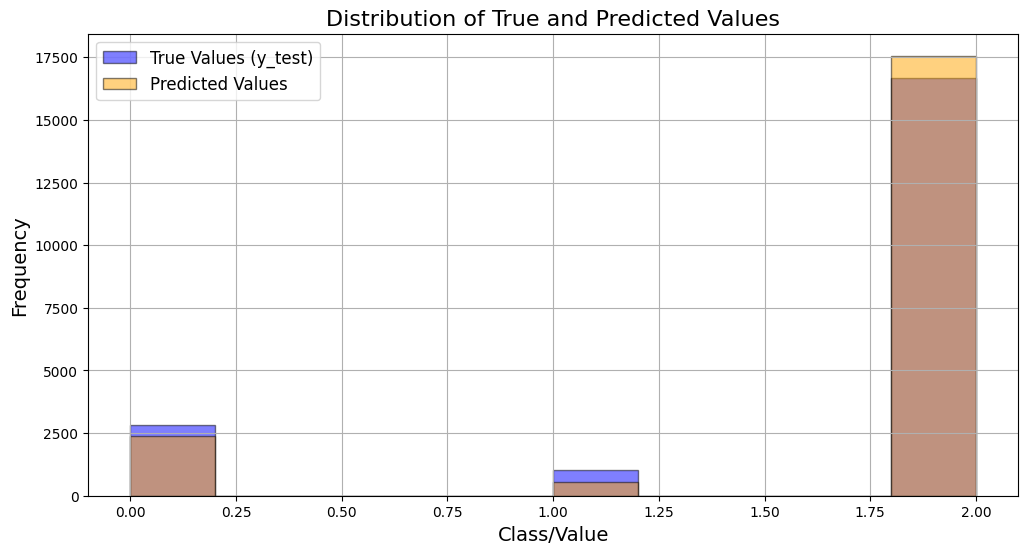

In [44]:
SupportVectorMachinemodel(X_train_tfidf, y_train, X_test_tfidf, y_test)

In [21]:
neutral_reviews = dataset[dataset['Sentiment']=='neutral'].copy()

In [22]:
neutral_reviews

,Summary,Sentiment
4,ok ok product,neutral
129,average production,neutral
151,speed is very slow,neutral
181,built quality is not up to the mark overall av...,neutral
189,cooling very late n water will come slowly,neutral
...,...,...
204761,pure kaaaaj h,neutral
204896,honey finish,neutral
204908,quality is ok,neutral
204947,ok,neutral
